**Employee attrition project**
---

> # Introduction

> **Problem**

There's a leak of talent in an IT company causing projects to be paused and costs of replacements

*   There are no metrics of attrition
*   There are no metrics of the cost generated
*   The company does not know if there's an specific profile that it's abandoning the company

> **Objective**

*   Quantifying and understanding the problem from a business perspective.
*   Developing an automatic data-based system to predict which employees are at a higher risk of leaving the company.
*   Presenting the results obtained through a Tableau dashboard aimed at junior and senior HR analysts. This dashboard will enable them to monitor the situation and take appropriate actions accordingly.

> **Insights to obtain**

1. Quantify attrition rate
2. Find attrition profile
3. Quantify the total cost generated
4. Quantify possible saving

> # Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("EmployeeAttrition.csv", sep = ';', index_col= 'id', na_values='#N/D')
df

,age,leaving_company,travel,departament,distance_home,education,degree,employee,satisfaction_other_teammates,sex,...,satisfaction_teammates,hours_fortnight,actions_level,years_experience,q_training_last_year,conciliation,years_company,years_job_title,years_last_promotion,years_current_mgr
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Rarely,Sales,1,University College,Life Sciences,1,Medium,3.0,...,Low,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Frequently,R & D,8,High School,Life Sciences,1,High,2.0,...,Very_High,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Rarely,R & D,2,High School,Other,1,Very_High,2.0,...,Medium,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Frequently,R & D,3,University College,Life Sciences,1,Very_High,3.0,...,High,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Rarely,R & D,2,University College,Medical,1,Low,3.0,...,Very_High,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Frequently,R & D,23,Master,Medical,1,High,4.0,...,High,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Rarely,R & D,6,High School,Medical,1,Very_High,2.0,...,Low,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Rarely,R & D,4,Master,Life Sciences,1,Medium,4.0,...,Medium,80,1,6,0,NaN,6,NaN,0,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1470 non-null   int64  
 1   leaving_company               1470 non-null   object 
 2   travel                        1470 non-null   object 
 3   departament                   1470 non-null   object 
 4   distance_home                 1470 non-null   int64  
 5   education                     1369 non-null   object 
 6   degree                        1470 non-null   object 
 7   employee                      1470 non-null   int64  
 8   satisfaction_other_teammates  1470 non-null   object 
 9   sex                           1271 non-null   float64
 10  implication                   1452 non-null   object 
 11  job_level                     1470 non-null   int64  
 12  job_title                     1470 non-null   object 
 13  satisfac

> **Columns (features)**

`age` - Age of the employee.

`leaving_company` - Indicator variable (binary) representing whether the employee has left the company.

`travel` - Frequency of travel of the employee.

`departament` - Department within the company where the employee works.

`distance_home` - Distance of the employee's home from the workplace.

`education` - Level of education attained by the employee.

`degree` - Degree held by the employee.

`employee` - Indicator variable (binary) representing whether is an employee or not.

`satisfaction_other_teammates` - Satisfaction level of the teammates with the employee.

`sex` - Sex of the employee.

`implication` - Level of involvement7commitment of the employee in their current project.

`job_level` - Level or rank of the employee's position within the company.

`job_title` - Role of the employee.

`satisfacion_job` - Satisfaction level of the employee with their job.

`marital_status` - Marital status of the employee.

`monthly_salary` - Monthly salary of the employee.

`number_former_jobs` - Number of previous jobs held by the employee.

`legal_age` - Indicator variable (0 or 1) representing whether the employee is of legal age.

`extra_hours` - Number of extra hours worked by the employee.

`salary_increment_perc` - Percentage increase in salary received by the employee.

`evaluation` - Performance review result of the employee.

`satisfaction_teammates` - Satisfaction level of the employee with their teammates.

`hours_fortnight` - Number of hours worked by the employee in a fortnight.

`actions_level` - Level of autonomy or decision-making authority of the employee.

`years_experience` - Total years of work experience of the employee.

`q_training_last_year` - Quantity of training received by the employee in the last year.

`conciliation` - Motivation level of the employee.

`years_company` - Number of years the employee has been with the company.

`years_job_title` - Number of years the employee has held their current job title.

`years_last_promotion` - Number of years since the employee's last promotion.

`years_current_mgr` - Number of years the employee has been under their current manager.

> ## Null values analysis

In [4]:
df.isna().sum().sort_values(ascending = False)

years_job_title                 1238
conciliation                    1011
sex                              199
education                        101
satisfacion_job                   76
implication                       18
age                                0
actions_level                      0
evaluation                         0
satisfaction_teammates             0
hours_fortnight                    0
years_experience                   0
extra_hours                        0
q_training_last_year               0
years_company                      0
years_last_promotion               0
salary_increment_perc              0
monthly_salary                     0
legal_age                          0
number_former_jobs                 0
leaving_company                    0
marital_status                     0
job_title                          0
job_level                          0
satisfaction_other_teammates       0
employee                           0
degree                             0
d

In [5]:
round(df.isnull().sum()*100/df.shape[0], 2).sort_values(ascending= False)

years_job_title                 84.22
conciliation                    68.78
sex                             13.54
education                        6.87
satisfacion_job                  5.17
implication                      1.22
age                              0.00
actions_level                    0.00
evaluation                       0.00
satisfaction_teammates           0.00
hours_fortnight                  0.00
years_experience                 0.00
extra_hours                      0.00
q_training_last_year             0.00
years_company                    0.00
years_last_promotion             0.00
salary_increment_perc            0.00
monthly_salary                   0.00
legal_age                        0.00
number_former_jobs               0.00
leaving_company                  0.00
marital_status                   0.00
job_title                        0.00
job_level                        0.00
satisfaction_other_teammates     0.00
employee                         0.00
degree      

Conclusions:

* years_job_title & conciliation have too many null values (>50%) --> removed
* sex, education, satisfaction e commitment_level --> imputed after Exploratory Data Analysis (EDA)


In [6]:
df.drop(columns = ['years_job_title','conciliation'], inplace = True)
df

,age,leaving_company,travel,departament,distance_home,education,degree,employee,satisfaction_other_teammates,sex,...,salary_increment_perc,evaluation,satisfaction_teammates,hours_fortnight,actions_level,years_experience,q_training_last_year,years_company,years_last_promotion,years_current_mgr
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Rarely,Sales,1,University College,Life Sciences,1,Medium,3.0,...,11,High,Low,80,0,8,0,6,0,5
2,49,No,Frequently,R & D,8,High School,Life Sciences,1,High,2.0,...,23,Very_High,Very_High,80,1,10,3,10,1,7
4,37,Yes,Rarely,R & D,2,High School,Other,1,Very_High,2.0,...,15,High,Medium,80,0,7,3,0,0,0
5,33,No,Frequently,R & D,3,University College,Life Sciences,1,Very_High,3.0,...,11,High,High,80,0,8,3,8,3,0
7,27,No,Rarely,R & D,2,University College,Medical,1,Low,3.0,...,12,High,Very_High,80,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Frequently,R & D,23,Master,Medical,1,High,4.0,...,17,High,High,80,1,17,3,5,0,3
2062,39,No,Rarely,R & D,6,High School,Medical,1,Very_High,2.0,...,15,High,Low,80,1,9,5,7,1,7
2064,27,No,Rarely,R & D,4,Master,Life Sciences,1,Medium,4.0,...,20,Very_High,Medium,80,1,6,0,6,0,3


> ## EDA categorical columns

In [7]:
colours = ['#f2a73d', '#f76157', '#f6daab', '#dabd7b', '#f04155', '#ff823a', '#f2f26f', '#fff7bd', '#95cfb7', '#f40034',
           '#07f9a2', '#09c184', '#0a8967', '#0c5149', '#0d192b', '#fe1cac', '#820081', '#e4b302', '#e7204e', '#3f2c26']

In [8]:
axtitle_dict = {'family': 'serif', 'color': 'darkred', 'weight': 'bold', 'size': 12}
axlab_dict = {'family': 'serif', 'color': 'black', 'size': 10}

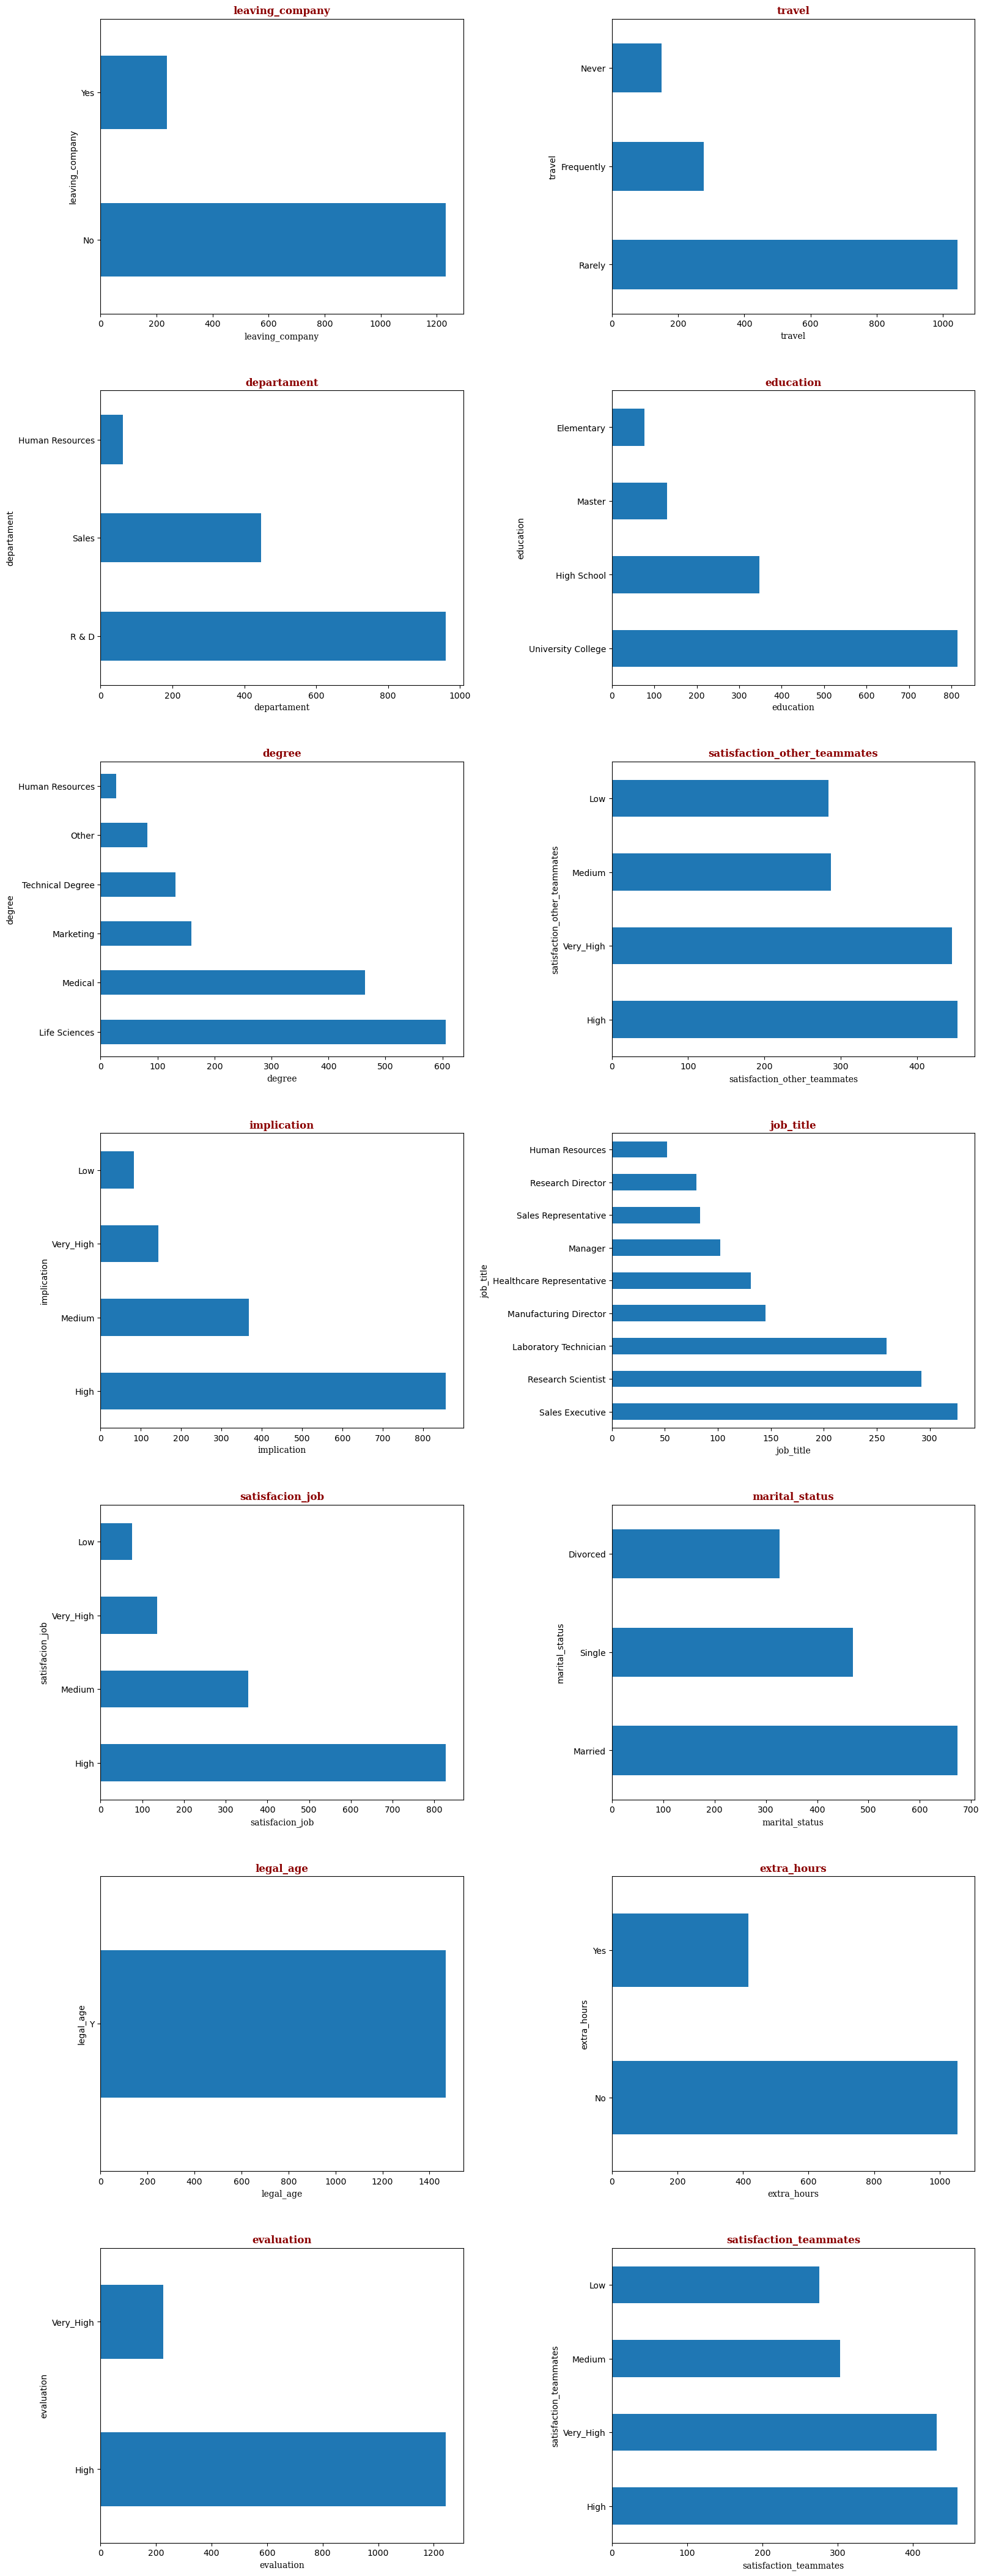

In [9]:
def graphics_eda_categorical(cat):

    # Let's calculate the amount of rows we need
    rows = round(cat.shape[1]/2)

    # Graphic design
    f, ax = plt.subplots(nrows = rows, ncols = 2, figsize = (16, rows * 6), sharex=False, sharey=False, constrained_layout=True, gridspec_kw={'hspace': 0.1})

    # Dimension change so we can iterate
    ax = ax.flat

    for i, col in enumerate(cat):
        cat[col].value_counts().plot.barh(ax = ax[i])
        ax[i].set_title(f'{col}', fontdict=axtitle_dict)
        ax[i].set_xlabel(f'{col}', fontdict=axlab_dict)

graphics_eda_categorical(df.select_dtypes('O'))

Conclusiones:

* legal_age only has 1 value --> removed
* About pending imputations of categorical columns:
  * education: to be imputed by 'University College'
  * satisfacion_job: to be imputed by 'High'
  * implication: to be imputed by 'High'

In [10]:
df.drop(columns = 'legal_age', inplace = True)

df['education'] = df['education'].fillna('University College')

df['satisfacion_job'] = df['satisfacion_job'].fillna('High')

df['implication'] = df['implication'].fillna('High')

> ## EDA numerical columns

In [11]:
def stats_numerical(num):

    stats = num.describe().T

    # Let's add the median
    stats['median'] = num.median()

    # Let's reorder so mean and median are next to each other
    stats = stats.iloc[:,[0,1,8,2,3,4,5,6,7]]

    return(stats)

In [12]:
stats_numerical(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
age,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distance_home,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
employee,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sex,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
job_level,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
monthly_salary,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
number_former_jobs,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
salary_increment_perc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
hours_fortnight,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
actions_level,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


Conclusions:

* Employees only has 1 value --> removed
* Sex only has 4 values --> removed
* Hours_fortnight only has 1 value --> removed


In [13]:
df.drop(columns = ['employee','sex','hours_fortnight'], inplace = True)
df

,age,leaving_company,travel,departament,distance_home,education,degree,satisfaction_other_teammates,implication,job_level,...,extra_hours,salary_increment_perc,evaluation,satisfaction_teammates,actions_level,years_experience,q_training_last_year,years_company,years_last_promotion,years_current_mgr
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Rarely,Sales,1,University College,Life Sciences,Medium,High,2,...,Yes,11,High,Low,0,8,0,6,0,5
2,49,No,Frequently,R & D,8,High School,Life Sciences,High,Medium,2,...,No,23,Very_High,Very_High,1,10,3,10,1,7
4,37,Yes,Rarely,R & D,2,High School,Other,Very_High,Medium,1,...,Yes,15,High,Medium,0,7,3,0,0,0
5,33,No,Frequently,R & D,3,University College,Life Sciences,Very_High,High,1,...,Yes,11,High,High,0,8,3,8,3,0
7,27,No,Rarely,R & D,2,University College,Medical,Low,High,1,...,No,12,High,Very_High,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Frequently,R & D,23,Master,Medical,High,Very_High,2,...,No,17,High,High,1,17,3,5,0,3
2062,39,No,Rarely,R & D,6,High School,Medical,Very_High,Medium,3,...,No,15,High,Low,1,9,5,7,1,7
2064,27,No,Rarely,R & D,4,Master,Life Sciences,Medium,Very_High,2,...,Yes,20,Very_High,Medium,1,6,0,6,0,3


> ## Insights

> Problem quantification: attrition rate?

In [14]:
df.leaving_company.value_counts(normalize = True) * 100

leaving_company
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

> Is there an specific profile that is leaving the company?

In [15]:
# Transformar abandono a numérica
df['leaving_company'] = df.leaving_company.map({'No':0, 'Yes':1})

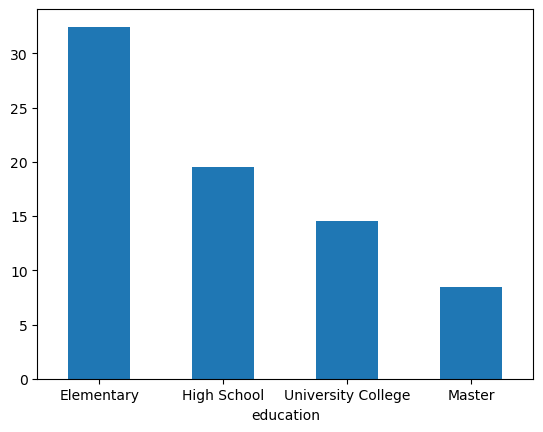

In [16]:
# Analysis by education
temp = df.groupby('education').leaving_company.mean().sort_values(ascending = False) * 100
temp.plot.bar(rot=0);

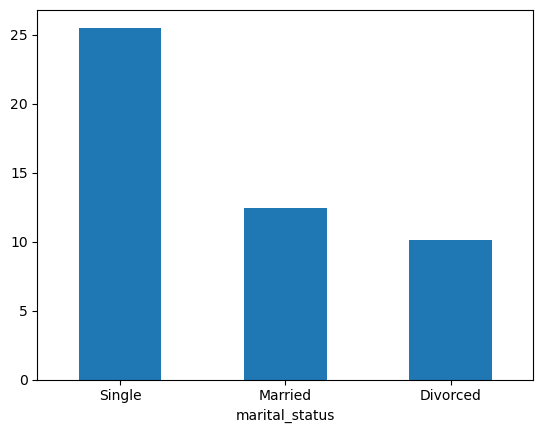

In [17]:
# Analysis by marital_status
temp = df.groupby('marital_status').leaving_company.mean().sort_values(ascending = False) * 100
temp.plot.bar(rot=0);

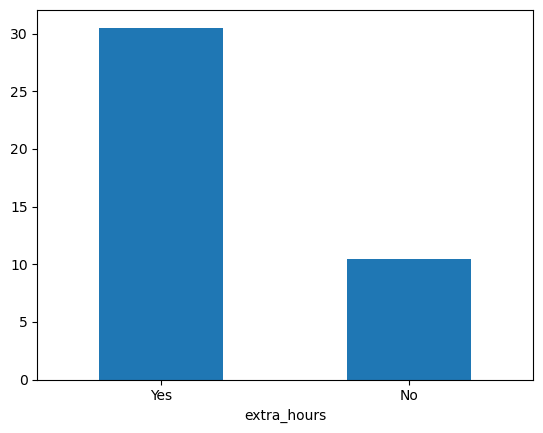

In [18]:
# Analysis by extra_hours
temp = df.groupby('extra_hours').leaving_company.mean().sort_values(ascending = False) * 100
temp.plot.bar(rot=0);

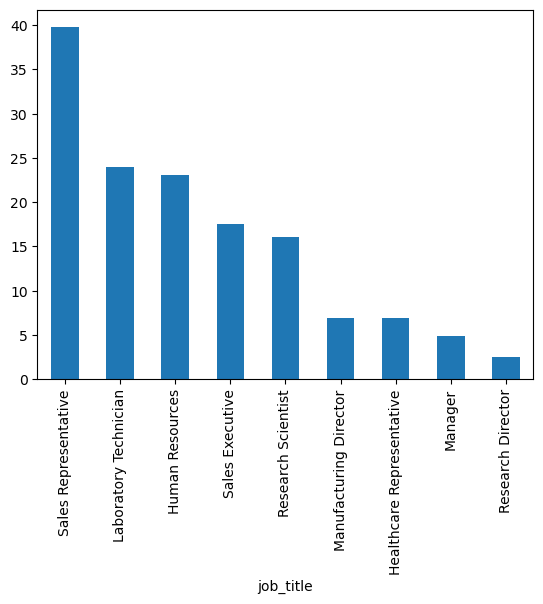

In [19]:
# Analysis by job_title
temp = df.groupby('job_title').leaving_company.mean().sort_values(ascending = False) * 100
temp.plot.bar();

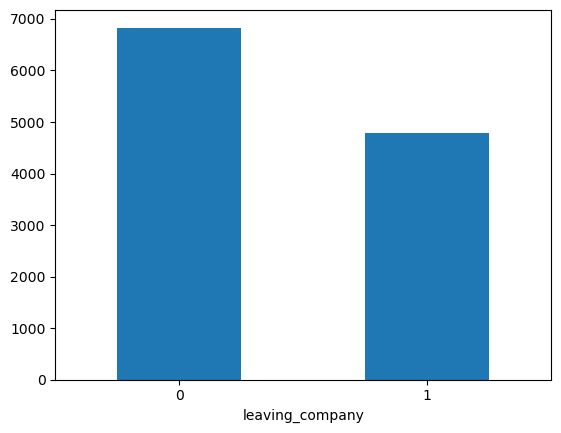

In [20]:
temp = df.groupby('leaving_company').monthly_salary.mean()
temp.plot.bar(rot=0);

The employee profile leaving the company is:

* Elementary School
* Single
* Work on sales department
* Low salary
* Big amount of extra hours

> Economic impact of the problem



According to the "Cost of Turnover" study by the Center for American Progress:

* The cost of employee turnover for those earning anually more than USD 30.000 is 16,1% of their salary.
* The cost of employee turnover for those earning anually between USD 30.000 - 50.000 is 19,7% of their salary.
* The cost of employee turnover for those earning anually between USD 50.000 - 75.000 is 20,4% of their salary.
* The cost of employee turnover for those earning anually more than USD 75.000 is 21% of their salary.

In [21]:
# Let's calculate the anual salary for each employee
df['anual_salary'] = df.monthly_salary.transform(lambda x: x*12)
df[['monthly_salary','anual_salary']]

,monthly_salary,anual_salary
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [22]:
# Let's calculate the economic impact of each employee if it leaves the company

# Conditions list
conditions = [(df['anual_salary'] <= 30000),
               (df['anual_salary'] > 30000) & (df['anual_salary'] <= 50000),
               (df['anual_salary'] > 50000) & (df['anual_salary'] <= 75000),
               (df['anual_salary'] > 75000)]

# Results list
results = [df.anual_salary * 0.161, df.anual_salary * 0.197, df.anual_salary * 0.204, df.anual_salary * 0.21]

#Aplicamos select
df['impact'] = np.select(conditions,results, default = -999)

df

,age,leaving_company,travel,departament,distance_home,education,degree,satisfaction_other_teammates,implication,job_level,...,evaluation,satisfaction_teammates,actions_level,years_experience,q_training_last_year,years_company,years_last_promotion,years_current_mgr,anual_salary,impact
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Rarely,Sales,1,University College,Life Sciences,Medium,High,2,...,High,Low,0,8,0,6,0,5,71916,14670.864
2,49,0,Frequently,R & D,8,High School,Life Sciences,High,Medium,2,...,Very_High,Very_High,1,10,3,10,1,7,61560,12558.240
4,37,1,Rarely,R & D,2,High School,Other,Very_High,Medium,1,...,High,Medium,0,7,3,0,0,0,25080,4037.880
5,33,0,Frequently,R & D,3,University College,Life Sciences,Very_High,High,1,...,High,High,0,8,3,8,3,0,34908,6876.876
7,27,0,Rarely,R & D,2,University College,Medical,Low,High,1,...,High,Very_High,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Frequently,R & D,23,Master,Medical,High,Very_High,2,...,High,High,1,17,3,5,0,3,30852,6077.844
2062,39,0,Rarely,R & D,6,High School,Medical,Very_High,Medium,3,...,High,Low,1,9,5,7,1,7,119892,25177.320
2064,27,0,Rarely,R & D,4,Master,Life Sciences,Medium,Very_High,2,...,Very_High,Medium,1,6,0,6,0,3,73704,15035.616


> Cost of this problem - last year


In [23]:
total_cost =  df.loc[df.leaving_company == 1].impact.sum()
total_cost

2719005.912

> Cost of employees without motivation (pérdidas en implicación == Baja)



In [24]:
df.loc[(df.leaving_company == 1) & (df.implication == 'Low')].impact.sum()

368672.688

> How much money can we save having a better employee policy

In [25]:
print(f"Reduce a 10% the attrition, would save $ {int(total_cost * 0.1)} each year.")

print(f"Reduce a 20% the attrition, would save $ {int(total_cost * 0.2)} each year.")

print(f"Reduce a 30% the attrition, would save $ {int(total_cost * 0.3)} each year.")

Reduce a 10% the attrition, would save $ 271900 each year.
Reduce a 20% the attrition, would save $ 543801 each year.
Reduce a 30% the attrition, would save $ 815701 each year.


And we can continue devising strategies associated with the abandonment insights:

It appears that the position with the highest turnover is 'sales representative'. Would it make sense to create a specific plan for them? What would be the cost saved if we reduce the turnover by 30%?

Let's calculate the percentage of sales representatives who have left in the past year.

In [26]:
total_sales_repr_past = len(df.loc[df.job_title == 'Sales Representative'])
sales_repr_left_past = len(df.loc[(df.job_title == 'Sales Representative') & (df.leaving_company == 1)])
perc_past = sales_repr_left_past / total_sales_repr_past
perc_past

0.39759036144578314

Now let's estimate how many will leave this year.

In [27]:
total_sales_repr_current = len(df.loc[(df.job_title == 'Sales Representative') & (df.leaving_company == 0)])
will_leave = int(total_sales_repr_current * perc_past)
will_leave

19

Let's suppose that we can retain 30% of them and calculate how much many that represents

In [28]:
retain = int(will_leave * 0.3)

savings = df.loc[(df.job_title == 'Sales Representative') & (df.leaving_company == 0),'impact'].sum() * perc_past * 0.3

print(f'We can retain {retain} sales representatives and that represents $ {round(savings)} in savings.')

We can retain 5 sales representatives and that represents $ 37447 in savings.


This data is also very interesting because it allows us to determine the budget for retention actions by department or profile.

Now we know we can spend up to $37.000 just on specific actions to retain sales representatives, and they would be paying for themselves with the avoided loss.

> # Machine Learning model

In [29]:
df_ml = df.copy()

In [30]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1470 non-null   int64  
 1   leaving_company               1470 non-null   int64  
 2   travel                        1470 non-null   object 
 3   departament                   1470 non-null   object 
 4   distance_home                 1470 non-null   int64  
 5   education                     1470 non-null   object 
 6   degree                        1470 non-null   object 
 7   satisfaction_other_teammates  1470 non-null   object 
 8   implication                   1470 non-null   object 
 9   job_level                     1470 non-null   int64  
 10  job_title                     1470 non-null   object 
 11  satisfacion_job               1470 non-null   object 
 12  marital_status                1470 non-null   object 
 13  monthly_

> ## Data preparation

> ## Feature engineering: One Hot Encoding

In [31]:
from sklearn.preprocessing import OneHotEncoder

cat = df_ml.select_dtypes('O')

ohe = OneHotEncoder(sparse = False)

ohe.fit(cat)

cat_ohe = ohe.transform(cat)

cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [32]:
cat_ohe

,travel_Frequently,travel_Never,travel_Rarely,departament_Human Resources,departament_R & D,departament_Sales,education_Elementary,education_High School,education_Master,education_University College,...,marital_status_Married,marital_status_Single,extra_hours_No,extra_hours_Yes,evaluation_High,evaluation_Very_High,satisfaction_teammates_High,satisfaction_teammates_Low,satisfaction_teammates_Medium,satisfaction_teammates_Very_High
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1468,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Let's combine the numerical variables with the cat_hoe ones and put htem all together in the final dataframe

In [33]:
num = df.select_dtypes('number').reset_index(drop = True)

In [34]:
df_ml = pd.concat([cat_ohe,num], axis = 1)
df_ml

,travel_Frequently,travel_Never,travel_Rarely,departament_Human Resources,departament_R & D,departament_Sales,education_Elementary,education_High School,education_Master,education_University College,...,number_former_jobs,salary_increment_perc,actions_level,years_experience,q_training_last_year,years_company,years_last_promotion,years_current_mgr,anual_salary,impact
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,11,0,8,0,6,0,5,71916,14670.864
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1,23,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,6,15,0,7,3,0,0,0,25080,4037.880
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,9,12,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4,17,1,17,3,5,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,15,1,9,5,7,1,7,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,20,1,6,0,6,0,3,73704,15035.616
1468,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,2,14,0,17,3,9,0,8,64680,13194.720


> ## Split sets


In [35]:
x = df_ml.drop(columns='leaving_company')
y = df_ml['leaving_company']

In [36]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 123)

> ## Model train



In [37]:
from sklearn.tree import DecisionTreeClassifier

ac = DecisionTreeClassifier(max_depth=4)

# Train
ac.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=4)

> ## Prediction and validation (test set)

In [38]:
# Prediction
pred = ac.predict_proba(test_x)[:, 1]
pred[:20]

array([0.59259259, 0.07386364, 0.07386364, 0.07386364, 0.07386364,
       0.07386364, 0.34482759, 0.07386364, 0.11486486, 0.6875    ,
       0.07386364, 0.11486486, 0.07386364, 0.15328467, 0.07386364,
       0.15328467, 0.15328467, 0.07386364, 0.07386364, 0.07386364])

In [39]:
# Evaluación
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y,pred)

0.7207830774853801

> ## Interpretation

> ### Tree design

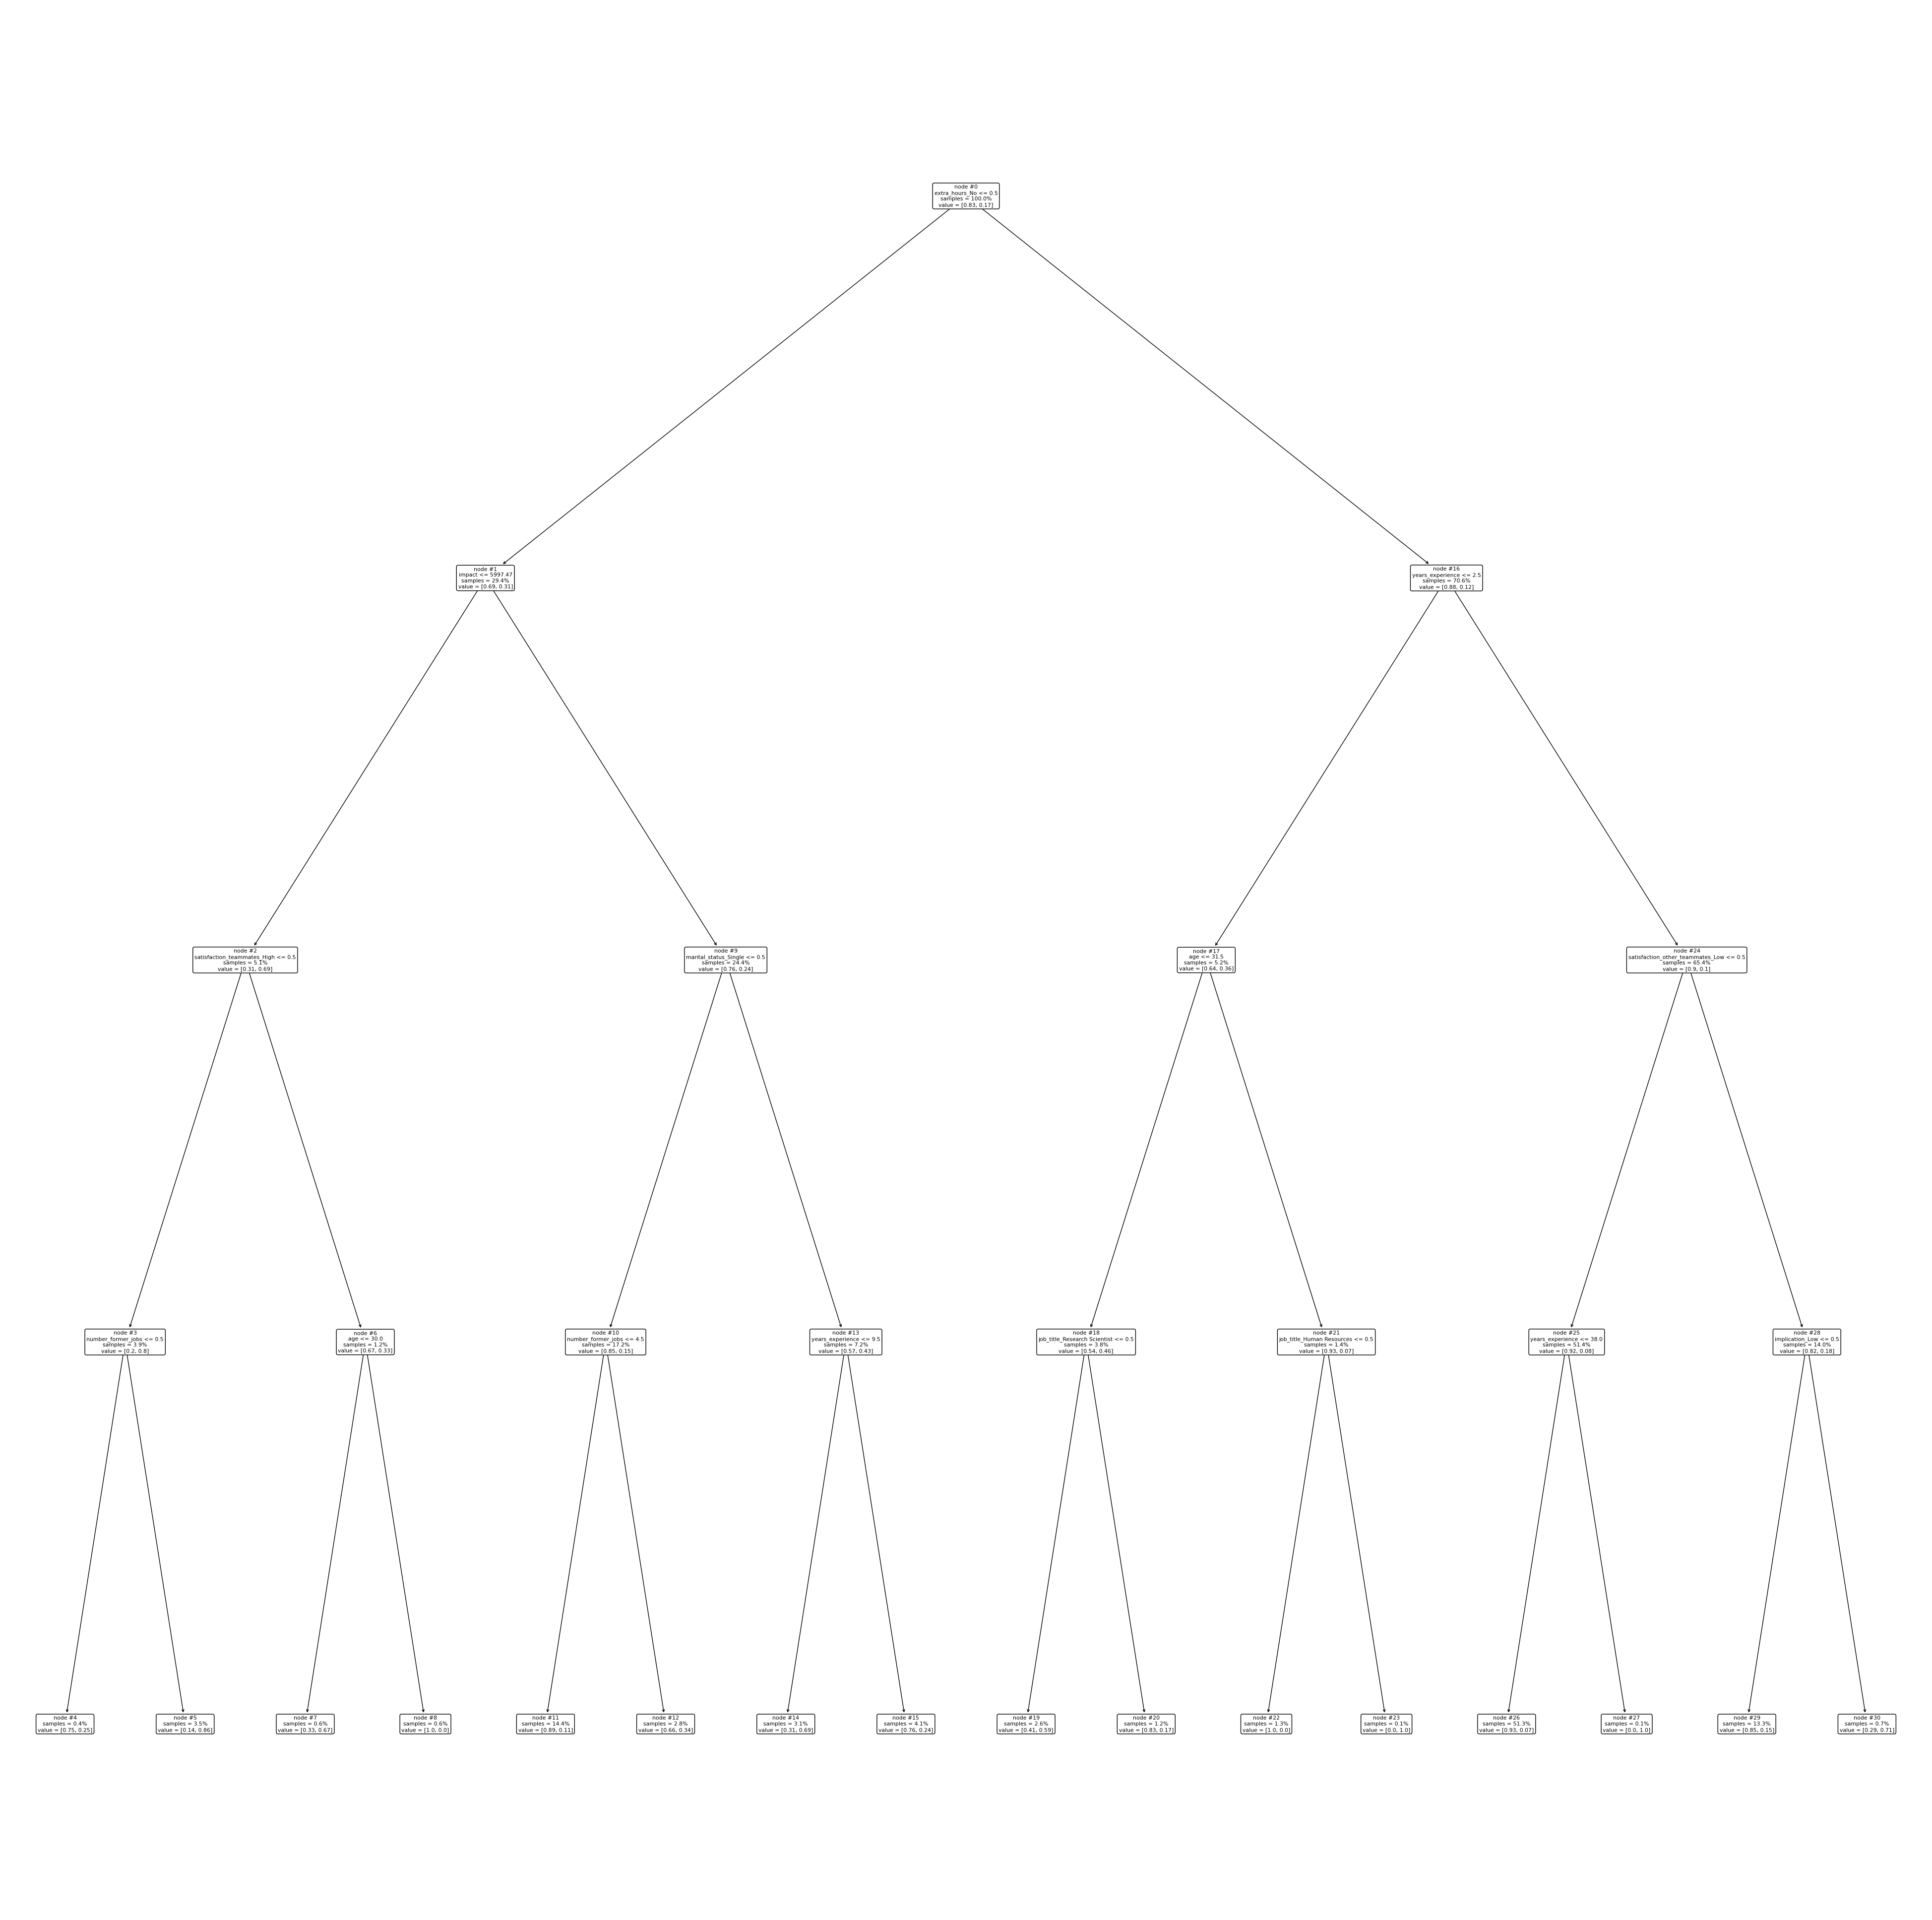

In [40]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50,50))

plot_tree(ac,
          feature_names= test_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

> ### Most important features

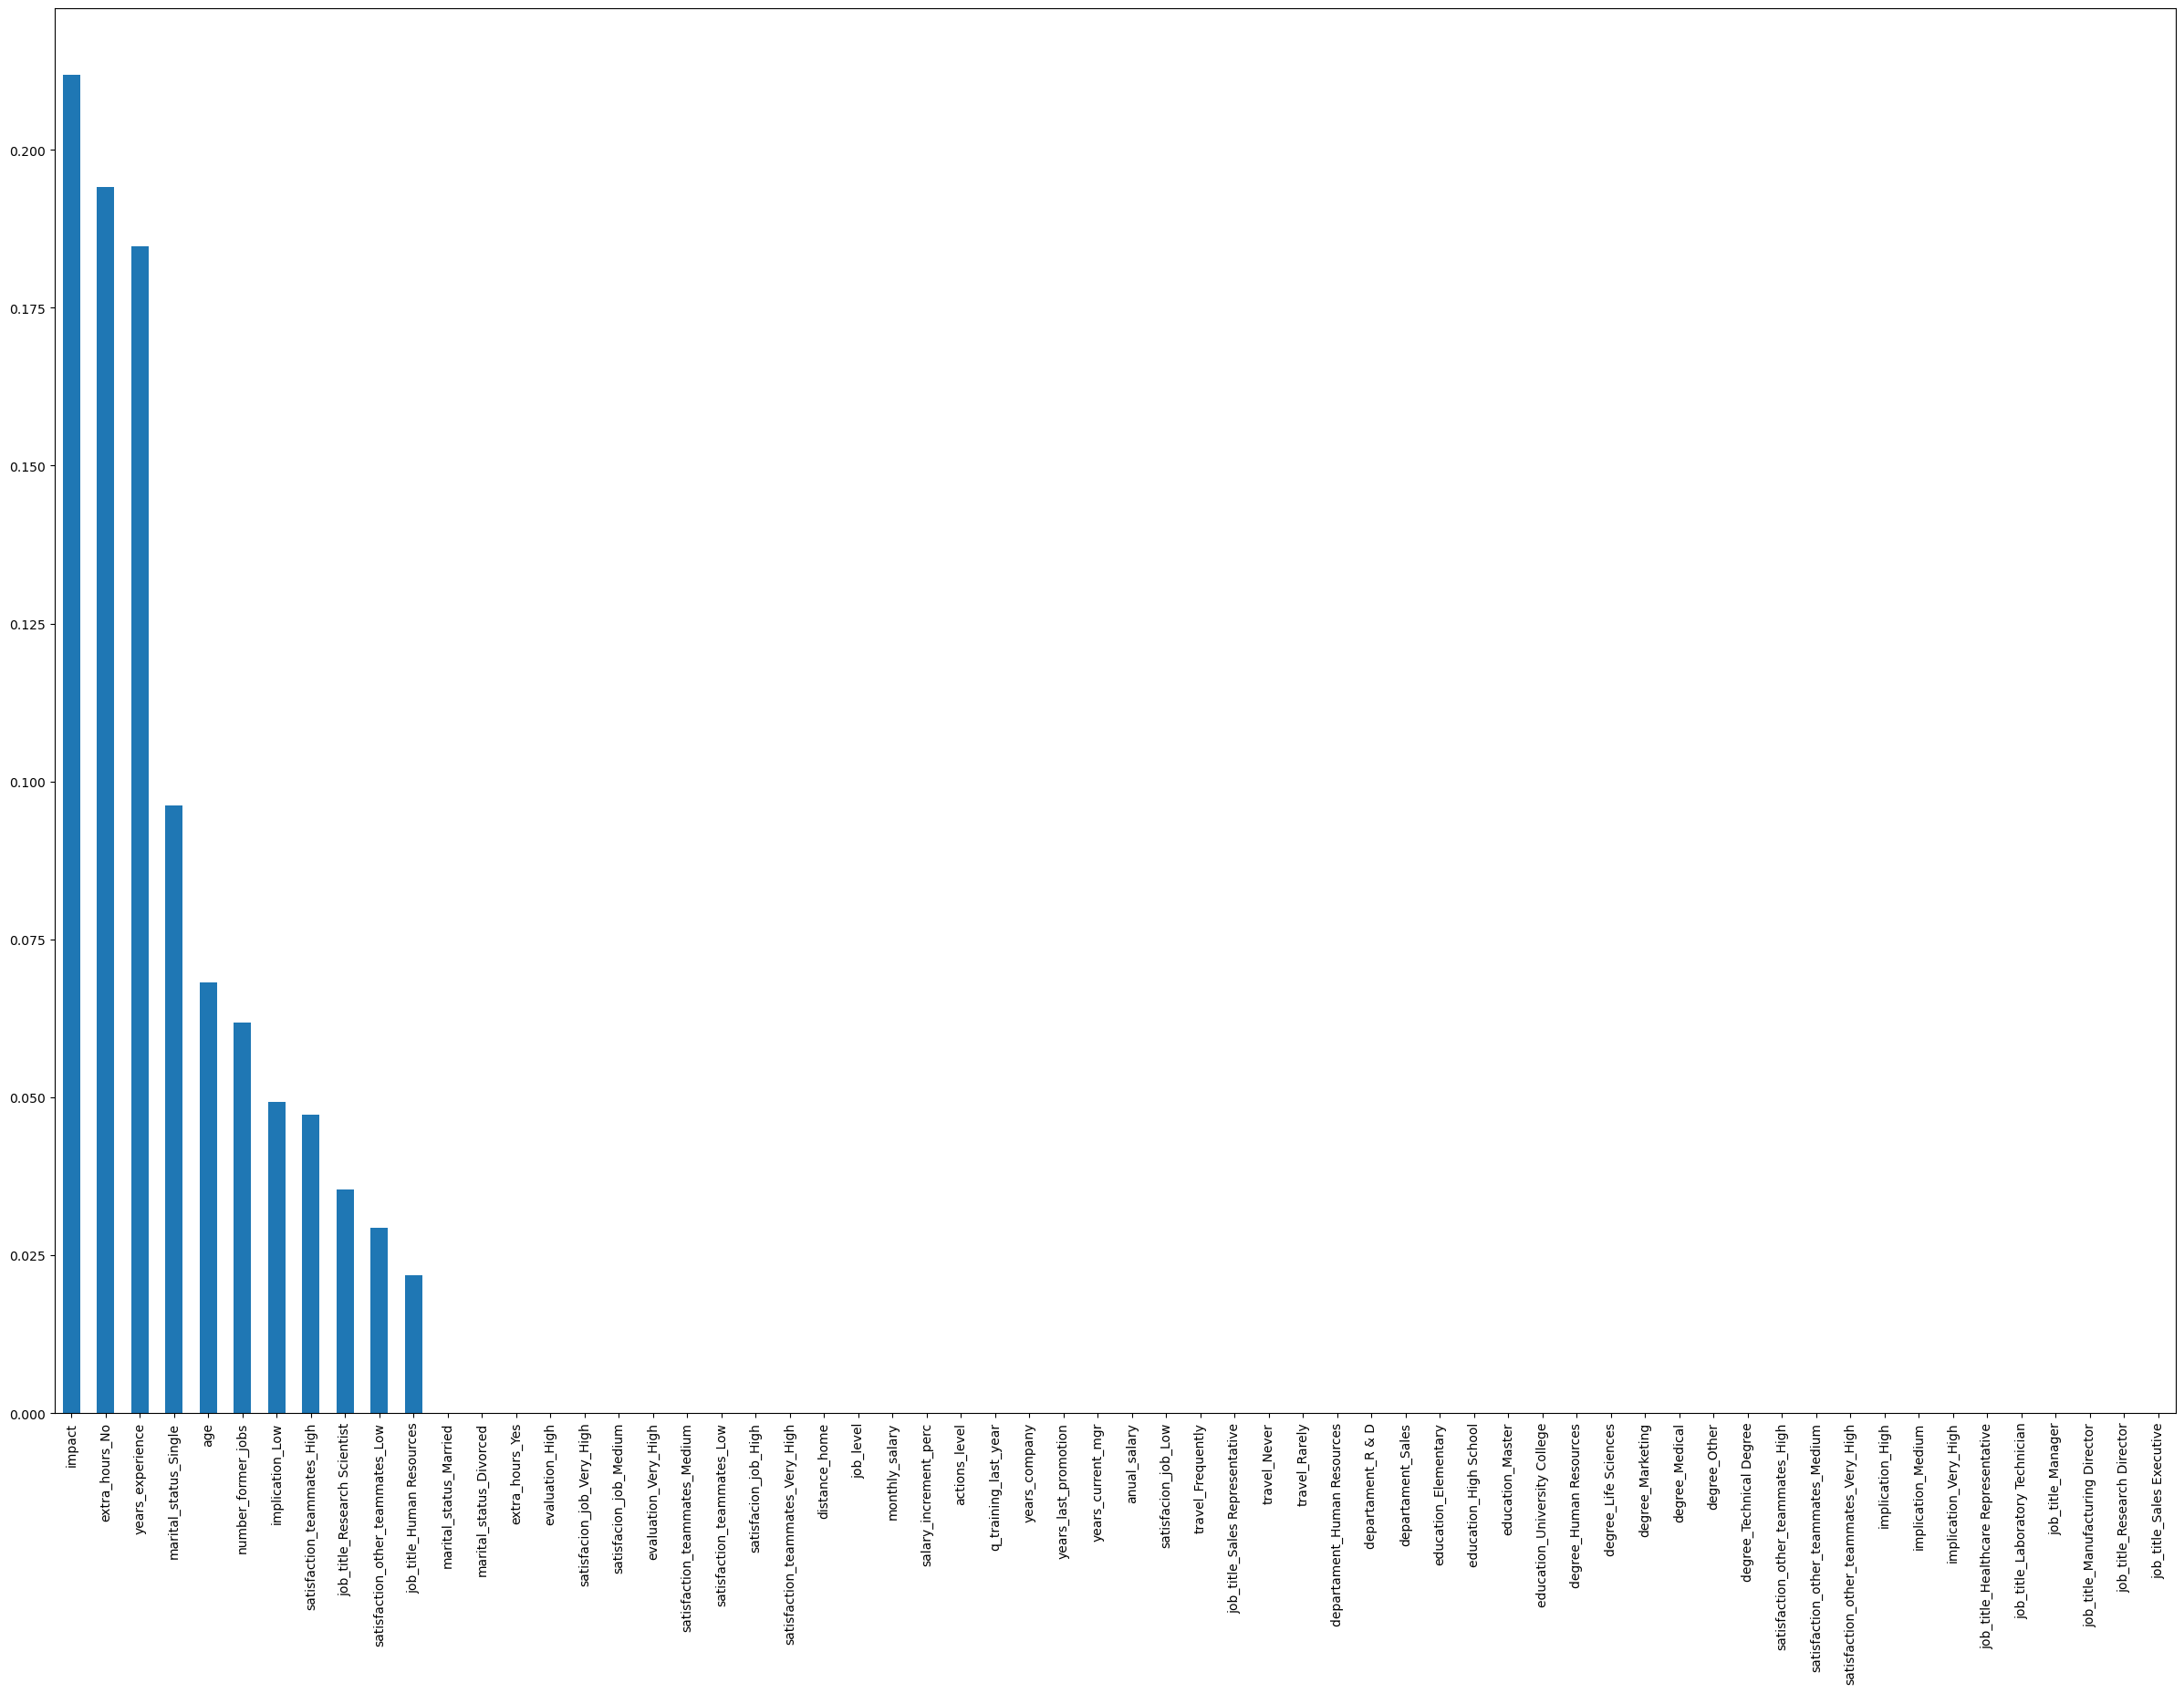

In [41]:
pd.Series(ac.feature_importances_,index = test_x.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20));

Adding the probability of leaving the company to each employee

In [42]:
df['scoring'] = ac.predict_proba(df_ml.drop(columns = 'leaving_company'))[:, 1]
df

,age,leaving_company,travel,departament,distance_home,education,degree,satisfaction_other_teammates,implication,job_level,...,satisfaction_teammates,actions_level,years_experience,q_training_last_year,years_company,years_last_promotion,years_current_mgr,anual_salary,impact,scoring
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Rarely,Sales,1,University College,Life Sciences,Medium,High,2,...,Low,0,8,0,6,0,5,71916,14670.864,0.687500
2,49,0,Frequently,R & D,8,High School,Life Sciences,High,Medium,2,...,Very_High,1,10,3,10,1,7,61560,12558.240,0.073864
4,37,1,Rarely,R & D,2,High School,Other,Very_High,Medium,1,...,Medium,0,7,3,0,0,0,25080,4037.880,0.861111
5,33,0,Frequently,R & D,3,University College,Life Sciences,Very_High,High,1,...,High,0,8,3,8,3,0,34908,6876.876,0.114865
7,27,0,Rarely,R & D,2,University College,Medical,Low,High,1,...,Very_High,1,6,3,2,2,2,41616,8198.352,0.153285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Frequently,R & D,23,Master,Medical,High,Very_High,2,...,High,1,17,3,5,0,3,30852,6077.844,0.073864
2062,39,0,Rarely,R & D,6,High School,Medical,Very_High,Medium,3,...,Low,1,9,5,7,1,7,119892,25177.320,0.073864
2064,27,0,Rarely,R & D,4,Master,Life Sciences,Medium,Very_High,2,...,Medium,1,6,0,6,0,3,73704,15035.616,0.114865


Example of the 10 employees at higher risk of leaving the company

In [43]:
df.sort_values(by = 'scoring', ascending = False)[0:10]

,age,leaving_company,travel,departament,distance_home,education,degree,satisfaction_other_teammates,implication,job_level,...,satisfaction_teammates,actions_level,years_experience,q_training_last_year,years_company,years_last_promotion,years_current_mgr,anual_salary,impact,scoring
id,,,,,,,,,,,,,,,,,,,,,
1467,34,1,Rarely,Human Resources,9,University College,Technical Degree,Low,High,1,...,Very_High,0,2,0,2,2,2,32904,6482.088,1.000000
165,58,1,Rarely,R & D,23,University College,Medical,Very_High,High,3,...,Very_High,1,40,3,40,15,6,123744,25986.240,1.000000
1292,42,0,Rarely,R & D,7,University College,Medical,Medium,Very_High,2,...,Very_High,0,18,2,1,0,0,28464,4582.704,0.861111
1649,40,1,Rarely,R & D,7,University College,Life Sciences,Low,High,1,...,Medium,0,10,3,4,0,3,25992,4184.712,0.861111
284,22,0,Rarely,R & D,5,Master,Life Sciences,Very_High,Very_High,1,...,Low,1,4,2,4,2,2,27936,4497.696,0.861111
816,29,1,Rarely,R & D,1,High School,Life Sciences,Medium,Medium,1,...,Very_High,1,1,1,1,0,0,27828,4480.308,0.861111
1244,27,0,Rarely,R & D,14,University College,Life Sciences,Low,High,1,...,Very_High,2,9,3,9,6,8,26820,4318.020,0.861111
848,26,1,Frequently,R & D,5,University College,Medical,High,Medium,1,...,Low,1,8,2,8,1,7,28392,4571.112,0.861111
45,24,1,Rarely,R & D,1,University College,Medical,Medium,High,1,...,Low,1,6,2,2,2,0,27516,4430.076,0.861111


Risk of leaving the firm by job title

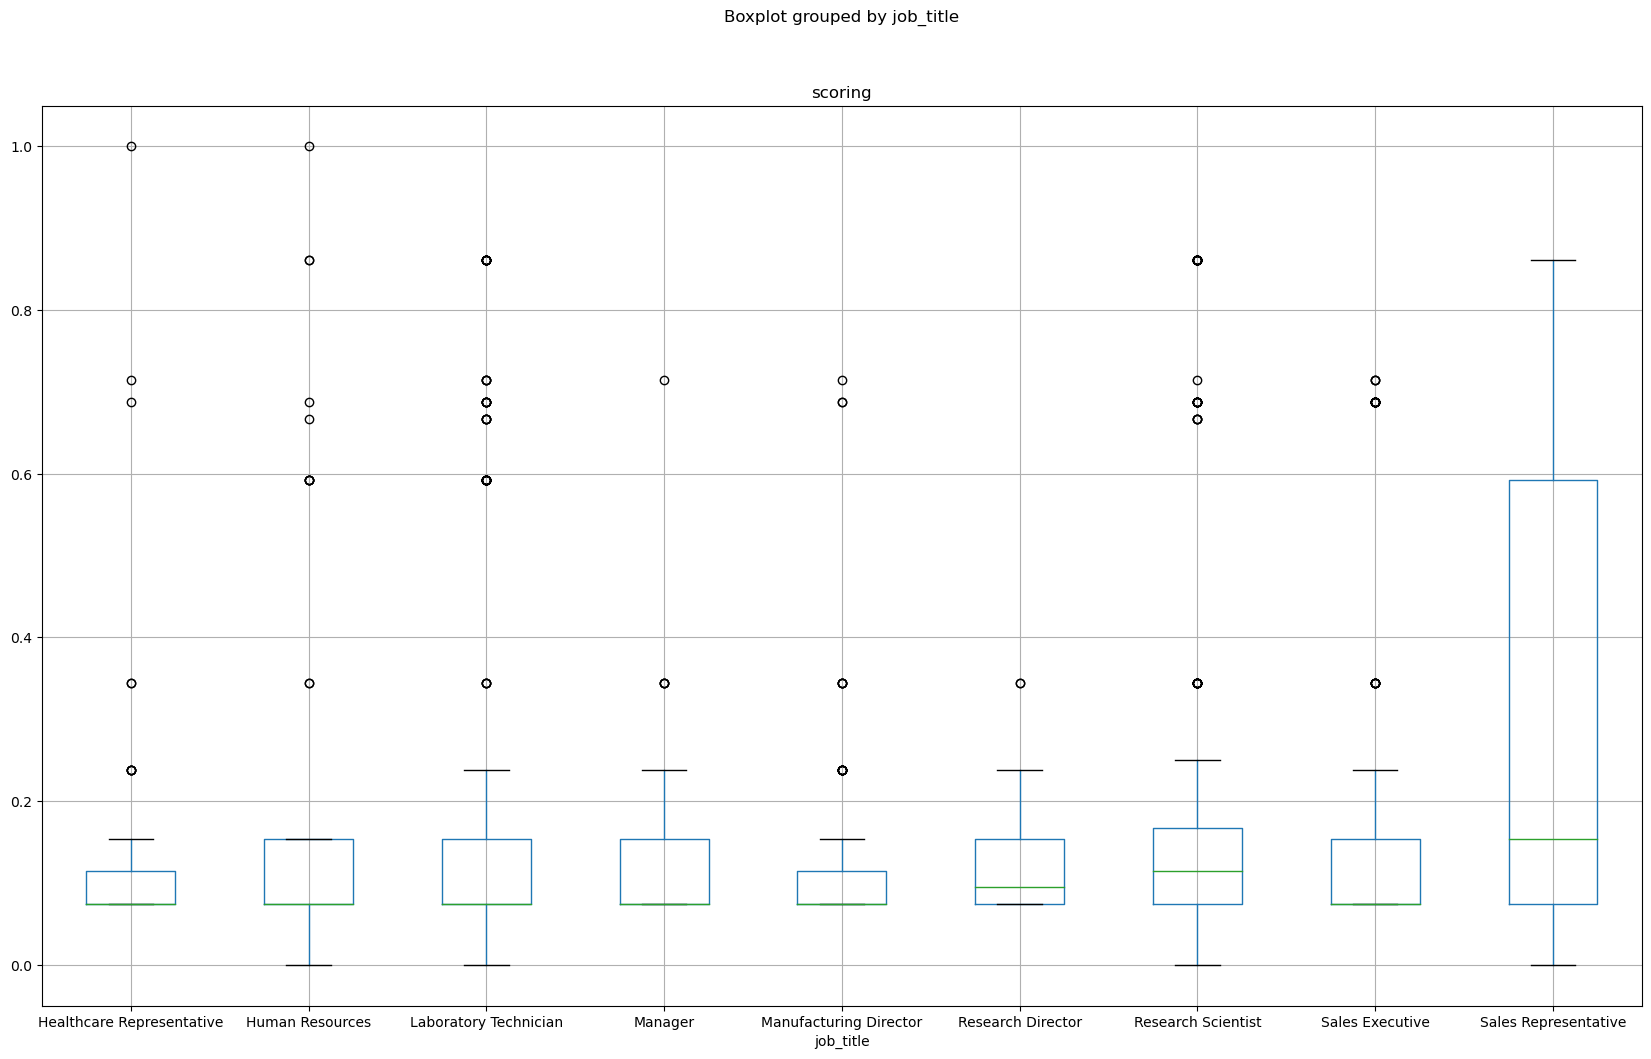

In [44]:
df.boxplot(column='scoring', by='job_title', figsize = (20,12));

> ### Tableau dashboard

Saving the result so as to use it to build the tableau dashboard

In [45]:
df

,age,leaving_company,travel,departament,distance_home,education,degree,satisfaction_other_teammates,implication,job_level,...,satisfaction_teammates,actions_level,years_experience,q_training_last_year,years_company,years_last_promotion,years_current_mgr,anual_salary,impact,scoring
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Rarely,Sales,1,University College,Life Sciences,Medium,High,2,...,Low,0,8,0,6,0,5,71916,14670.864,0.687500
2,49,0,Frequently,R & D,8,High School,Life Sciences,High,Medium,2,...,Very_High,1,10,3,10,1,7,61560,12558.240,0.073864
4,37,1,Rarely,R & D,2,High School,Other,Very_High,Medium,1,...,Medium,0,7,3,0,0,0,25080,4037.880,0.861111
5,33,0,Frequently,R & D,3,University College,Life Sciences,Very_High,High,1,...,High,0,8,3,8,3,0,34908,6876.876,0.114865
7,27,0,Rarely,R & D,2,University College,Medical,Low,High,1,...,Very_High,1,6,3,2,2,2,41616,8198.352,0.153285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Frequently,R & D,23,Master,Medical,High,Very_High,2,...,High,1,17,3,5,0,3,30852,6077.844,0.073864
2062,39,0,Rarely,R & D,6,High School,Medical,Very_High,Medium,3,...,Low,1,9,5,7,1,7,119892,25177.320,0.073864
2064,27,0,Rarely,R & D,4,Master,Life Sciences,Medium,Very_High,2,...,Medium,1,6,0,6,0,3,73704,15035.616,0.114865


In [46]:
df.to_excel('Employee_attrition_with_scoring.xlsx')

Link to the dashboard: https://public.tableau.com/app/profile/santiago.maldonado/viz/EmployeeAttrition_17115453359380/EmployeeAttrition